Saving students_class10_basic_dataset.csv to students_class10_basic_dataset (13).csv
   RollNo           Name  Gender         DOB  Attendance_%   House  Q_Maths  \
0       1   Aarav Sharma    Male  12/27/2003          84.2    Blue       69   
1       2     Aditi Nair  Female    2/5/2003          84.7     Red       62   
2       3  Bhavesh Patel    Male   1/24/2003          98.7   Green       55   
3       4  Bhavna Kapoor  Female   12/5/2003          96.5  Yellow      100   
4       5   Charan Reddy    Male   4/27/2003          79.4   Green       62   

   Q_Science  Q_English  Q_History  ...  F_History  F_Geography  F_Civics  \
0         70         74         87  ...         83           85        56   
1         78         64         69  ...         75           86        90   
2         58         75         92  ...         93           88        80   
3         74         69         71  ...         91           79        86   
4         68         76         65  ...         77     

/tmp/ipython-input-273181768.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column=[col.strip().lower().replace(" ","_") for col in df.columns]


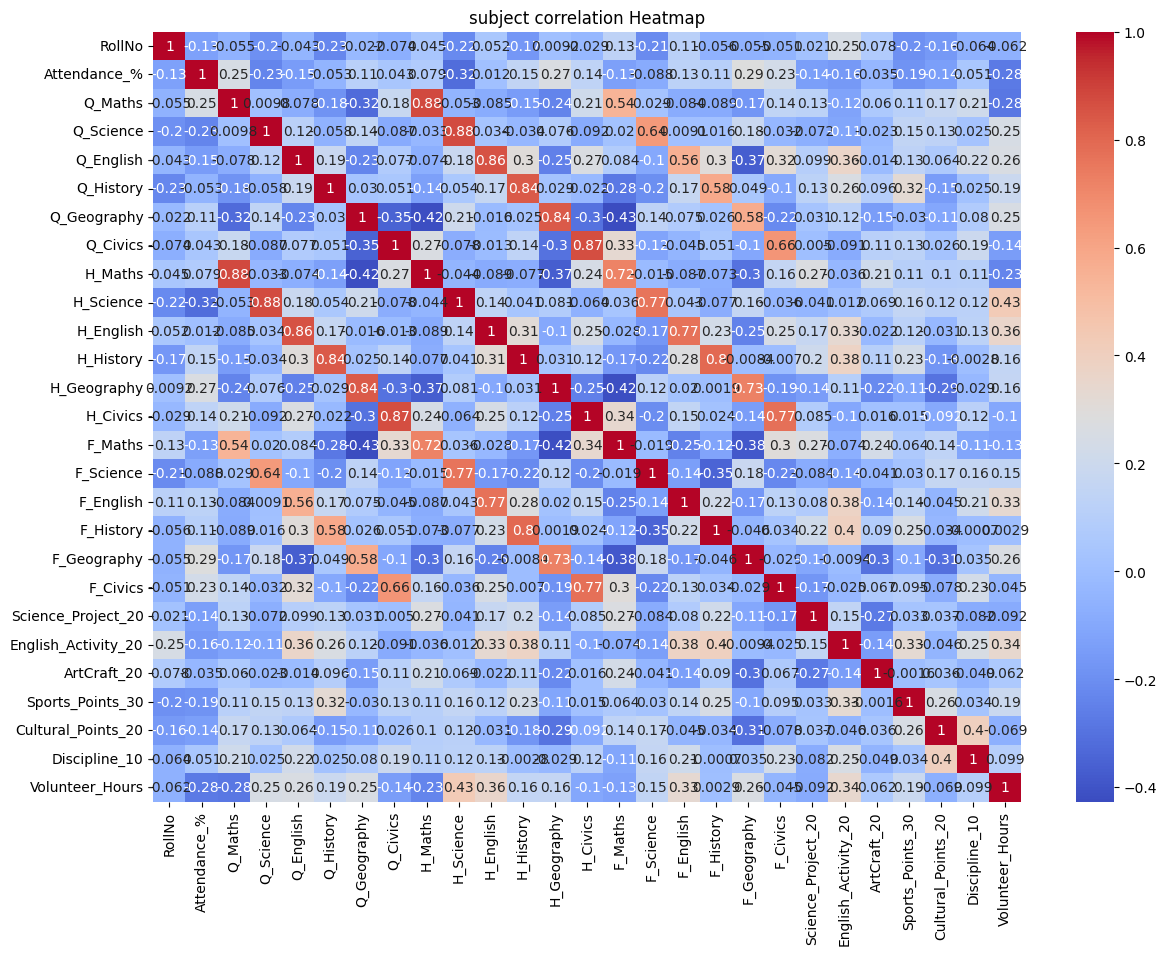

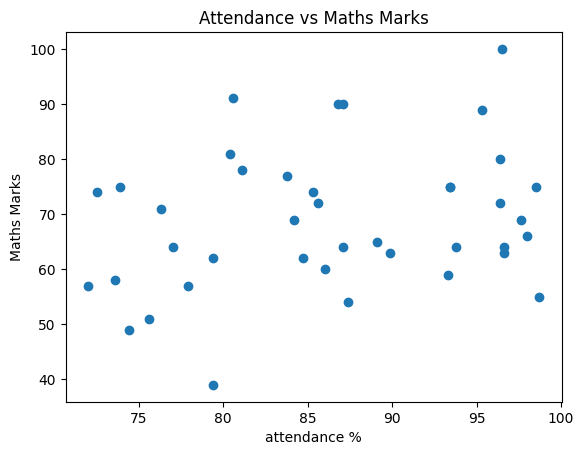

Top 5 students:
     RollNo  Total_Marks
8        9          476
22      23          472
6        7          469
9       10          460
37      38          456
Bottom 5 students:
     RollNo  Total_Marks
26      27          369
34      35          374
13      14          375
25      26          381
35      36          381
students below aerage:
     RollNo  Total_Marks
1        2          417
2        3          409
4        5          385
12      13          417
13      14          375
15      16          425
19      20          399
21      22          425
24      25          407
25      26          381
26      27          369
29      30          422
30      31          415
31      32          424
34      35          374
35      36          381
38      39          416
39      40          406
📊 DATA ANALYSIS REPORT
--------------------------------------------------
Total Students: 40
Average Attendance: 86.39%

Subjects ranked by average marks:
Attendance_%           86.3900
F_Geograp

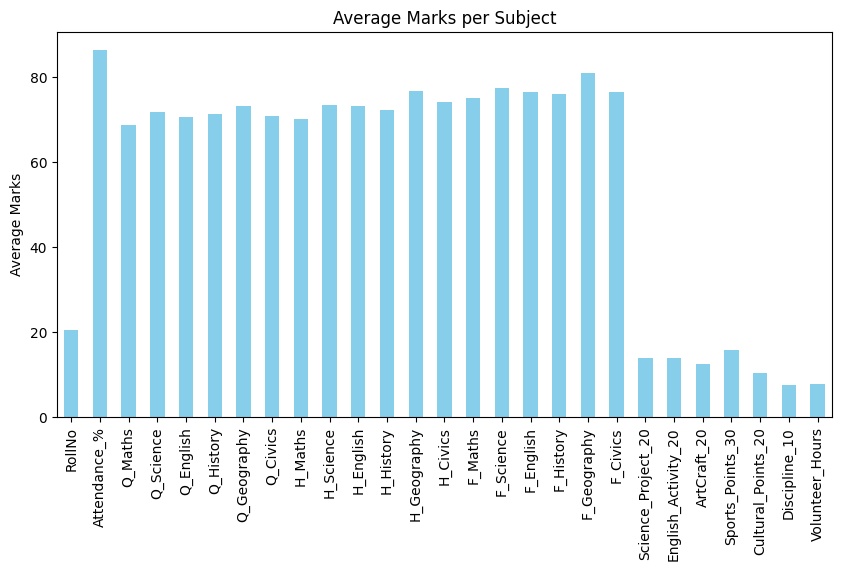

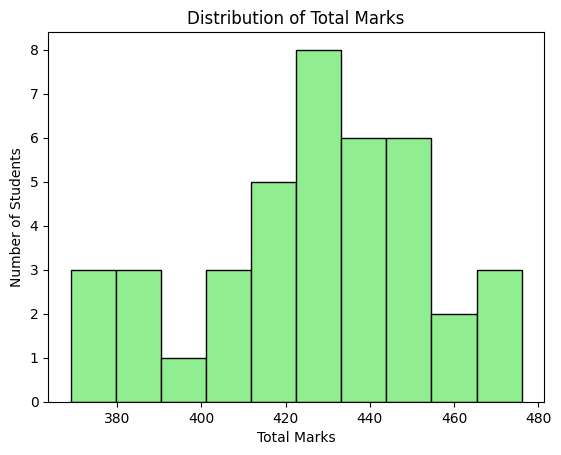

In [18]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
df=pd.read_csv('students_class10_basic_dataset.csv')
print(df.head())
print(df.info())
print(df.describe())
df=df.dropna()
df=df.drop_duplicates()
df.column=[col.strip().lower().replace(" ","_") for col in df.columns]
#calculating mean marks for each column
mean_scores=df.mean(numeric_only=True)
print(mean_scores.sort_values(ascending=False))
corr=df.corr(numeric_only=True)#correlation matrix
print(corr)
#visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("subject correlation Heatmap")
plt.show()
#to see higer attendence
plt.scatter(df['Attendance_%'],df['Q_Maths'])
plt.xlabel('attendance %')
plt.ylabel("Maths Marks")
plt.title('Attendance vs Maths Marks')
plt.show()
#top 5 and bottom 5 students
df['Total_Marks']=df[['Q_Maths','Q_Science','Q_English','Q_History','Q_Geography','Q_Civics']].sum(axis=1)
print("Top 5 students:\n", df.nlargest(5, 'Total_Marks')[['RollNo','Total_Marks']])
print("Bottom 5 students:\n", df.nsmallest(5, 'Total_Marks')[['RollNo','Total_Marks']])
#students need improvement
weak_students=df[df['Total_Marks']<df['Total_Marks'].mean()]
print("students below aerage:\n", weak_students[['RollNo', 'Total_Marks']])
#data analysis report
print("📊 DATA ANALYSIS REPORT")
print("-"*50)

print(f"Total Students: {len(df)}")
print(f"Average Attendance: {df['Attendance_%'].mean():.2f}%")

print("\nSubjects ranked by average marks:")
print(mean_scores.sort_values(ascending=False))

print("\nHighest performing subject:", mean_scores.idxmax())
print("Lowest performing subject:", mean_scores.idxmin())

print("\nCorrelation between Maths and Science:", round(df['Q_Maths'].corr(df['Q_Science']),2))
print("Correlation between English and History:", round(df['Q_English'].corr(df['Q_History']),2))

print("\nAverage total marks:", df['Total_Marks'].mean().round(2))
print("\nTop 5 Students:")
print(df.nlargest(5, 'Total_Marks')[['RollNo','Total_Marks']])

print("\nBottom 5 Students:")
print(df.nsmallest(5, 'Total_Marks')[['RollNo','Total_Marks']])
# Average marks per subject
mean_scores.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Average Marks per Subject")
plt.ylabel("Average Marks")
plt.show()

# Distribution of total marks
plt.hist(df['Total_Marks'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Distribution of Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Number of Students")
plt.show()